In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.numpy import mae, mse

In [ ]:
import pandas as pd

df = pd.read_csv('raggruppamento_Incidenti_2021_2023_Unita_urbanistiche.csv')
df

In [ ]:
df.dtypes

In [ ]:
df['campo_data'] = pd.to_datetime(df['campo_data'])
df.dtypes

In [ ]:
df = df.rename(columns={'nome_uu':'unique_id','campo_data': 'ds','num_incidente':'y'})

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
Y_df.dtypes

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df.dtypes

In [ ]:
df['unique_id'].value_counts()

In [ ]:
#val_size = 760
#test_size = 1517
#n_time = 7588

val_size = 88
test_size = 170
n_time = 880


print(n_time, val_size, test_size)

In [ ]:
nome_uu = 'ALBARO'

x_plot = df[df.unique_id==nome_uu].ds
x_val = x_plot[n_time - val_size - test_size]
x_test = x_plot[n_time - test_size]

In [ ]:
x_plot

In [ ]:
u_id = 'RIVAROLO'
y_plot = df[df.unique_id==nome_uu].y.values

In [ ]:
y_plot

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_plot, y_plot)
ax.set_xlabel('Date')
ax.set_ylabel('In RIVAROLO')
ax.axvline(x_val, color='black', linestyle='--')
ax.axvline(x_test, color='black', linestyle='--')

plt.text(x_val, -2, 'Validation', fontsize=12)
plt.text(x_test,-2, 'Test', fontsize=12)

plt.tight_layout()

In [ ]:
from utilsforecast.plotting import plot_series

In [ ]:
uids = df['unique_id'].unique()[:10]
uids

array(['ALBARO', 'ANGELI', 'APPARIZIONE', 'BAVARI', 'BEGATO', 'BELVEDERE',
       'BOLZANETO', 'BORGORATTI', 'BORZOLI EST', 'BORZOLI OVEST'],
      dtype=object)

In [ ]:
df_part = df.query('unique_id in @uids').reset_index(drop=True)
df_part

,unique_id,ds,y
0,ALBARO,2021-01-01,0
1,ALBARO,2021-01-02,0
2,ALBARO,2021-01-03,0
3,ALBARO,2021-01-04,0
4,ALBARO,2021-01-05,0
...,...,...,...
8795,BORZOLI OVEST,2023-05-26,0
8796,BORZOLI OVEST,2023-05-27,0
8797,BORZOLI OVEST,2023-05-28,0
8798,BORZOLI OVEST,2023-05-29,0


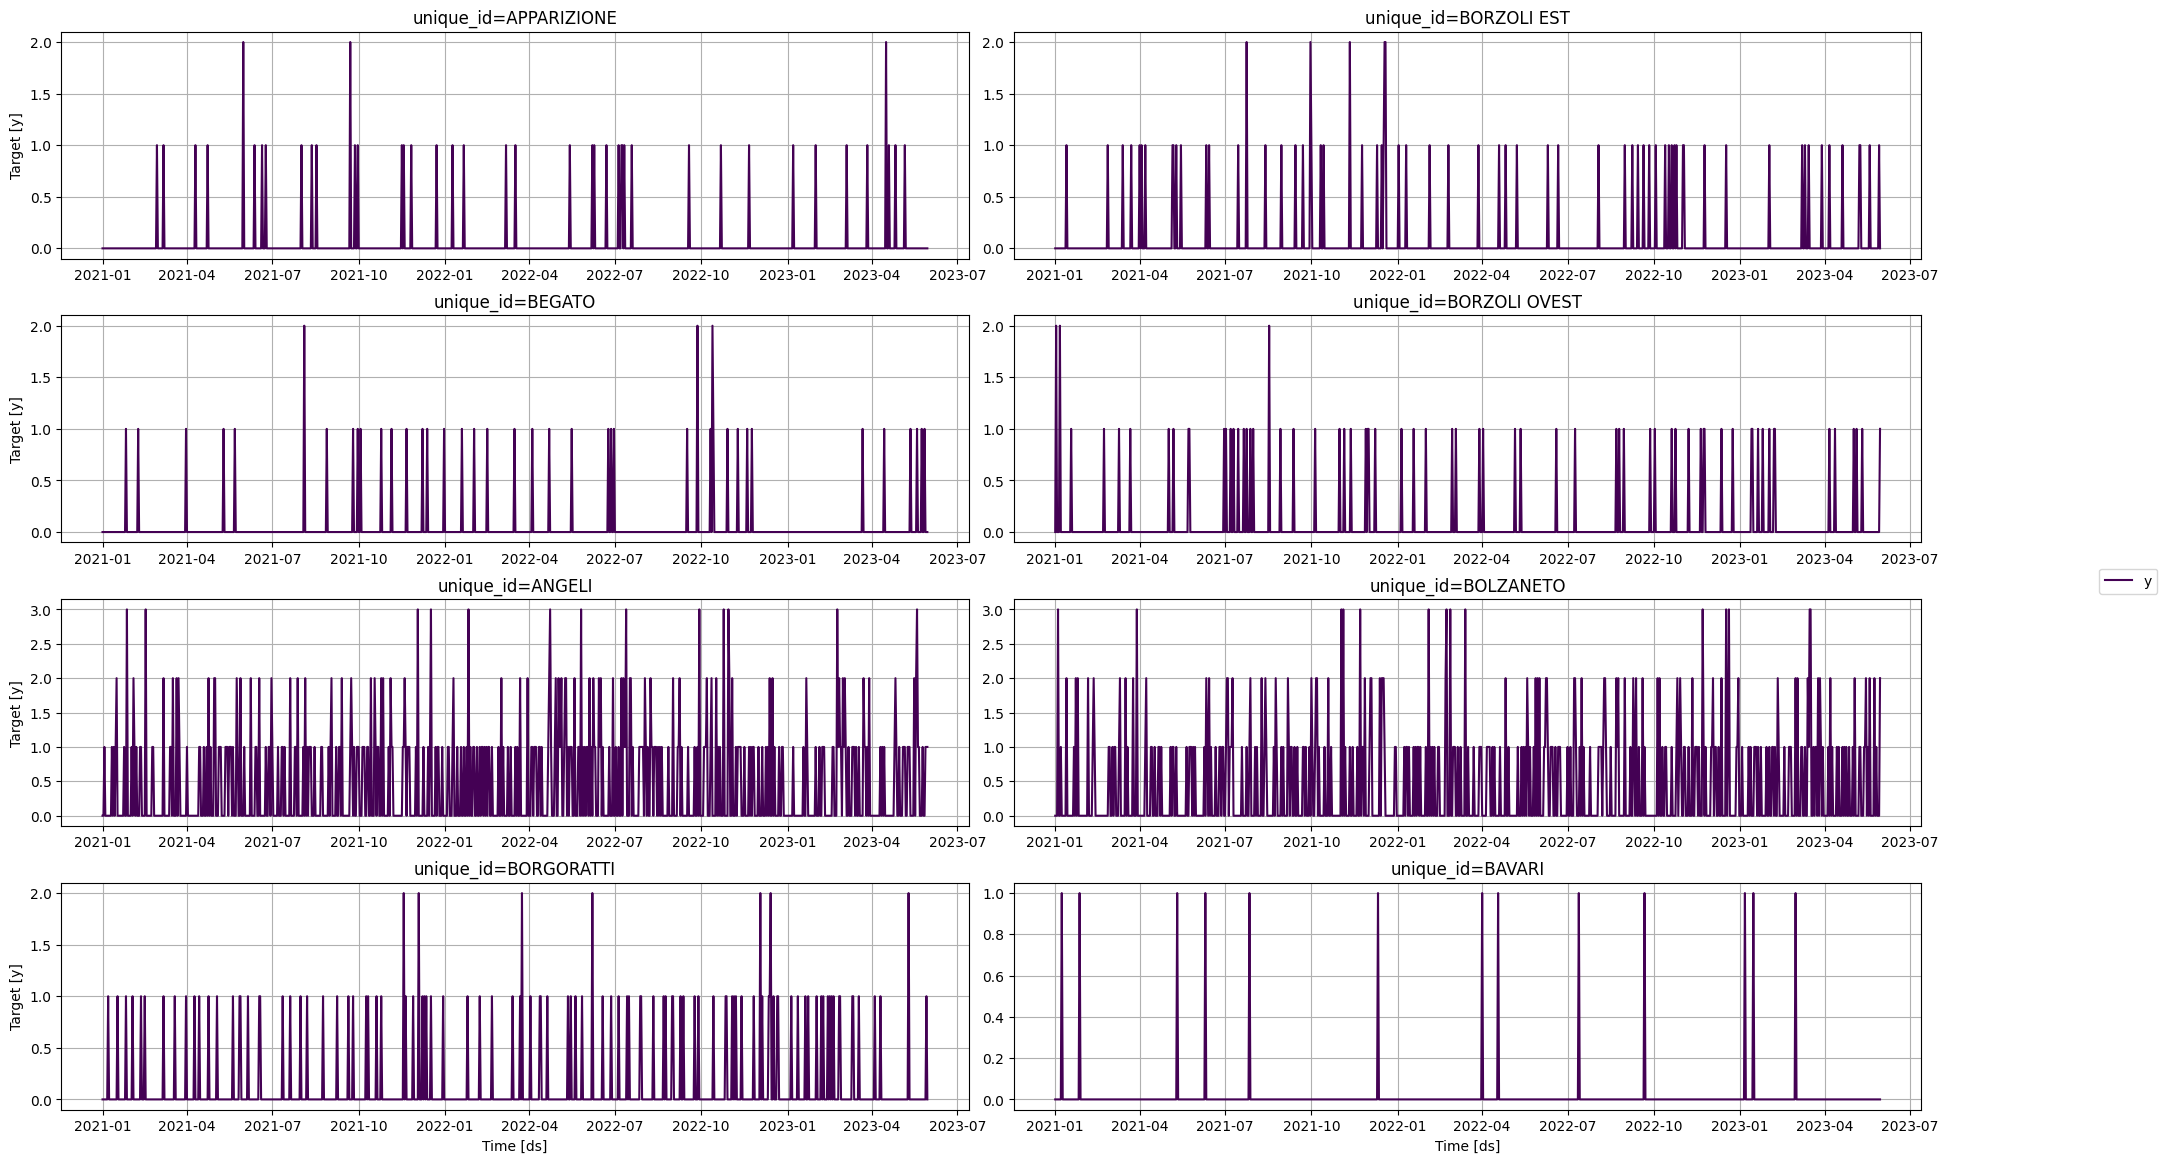

In [ ]:
plot_series(df_part)

In [ ]:
from neuralforecast.auto import MLP
from neuralforecast.losses.pytorch import MQLoss

In [ ]:
horizon = 2

models = [MLP(h=horizon,
               input_size=5*horizon,
               max_steps=50),
         NHITS(h=horizon,
               input_size=5*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=5*horizon,
               max_steps=50),
         PatchTST(h=horizon,
                 input_size=5*horizon,
                 max_steps=50)]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=models, freq='D')

In [ ]:
#preds_df = nf.cross_validation(df=df, val_size=val_size, test_size=test_size, n_windows=None)
preds_df = nf.cross_validation(df=df, n_windows=3, step_size=horizon, refit=1)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
preds_df

,ds,cutoff,MLP,NHITS,NBEATS,PatchTST,y
unique_id,,,,,,,
ALBARO,2023-05-25,2023-05-24,-0.000745,-0.002317,-0.001935,0.228776,1
ALBARO,2023-05-26,2023-05-24,0.005162,-0.001188,0.002278,0.222566,1
ALBARO,2023-05-27,2023-05-26,0.000087,0.012998,0.017169,0.737351,2
ALBARO,2023-05-28,2023-05-26,-0.000239,0.016863,0.011782,0.702480,0
ALBARO,2023-05-29,2023-05-28,0.002695,0.005115,0.003584,0.404238,1
...,...,...,...,...,...,...,...
VOLTRI,2023-05-26,2023-05-24,0.002444,-0.000049,-0.000333,0.001129,0
VOLTRI,2023-05-27,2023-05-26,-0.000216,0.000441,-0.000328,0.002143,0
VOLTRI,2023-05-28,2023-05-26,-0.000110,-0.000669,0.000233,0.002266,1


In [ ]:
y_true = preds_df['y'].values
y_pred_nhits = preds_df['NHITS'].values
y_pred_nbeats = preds_df['NBEATS'].values
y_pred_patchtst = preds_df['PatchTST'].values

In [ ]:
y_pred_patchtst

array([0.34790832, 0.35045475, 0.35325772, ..., 0.96883285, 0.95760214,
       0.9839621 ], dtype=float32)

In [ ]:
n_series = len(df['unique_id'].unique())
n_series

71

In [ ]:
y_true.shape

(144840,)

In [ ]:
y_true = y_true.reshape(n_series, -1, horizon)
y_pred_nhits = y_pred_nhits.reshape(n_series, -1, horizon)
y_pred_nbeats = y_pred_nbeats.reshape(n_series, -1, horizon)
y_pred_patchtst = y_pred_patchtst.reshape(n_series, -1, horizon)

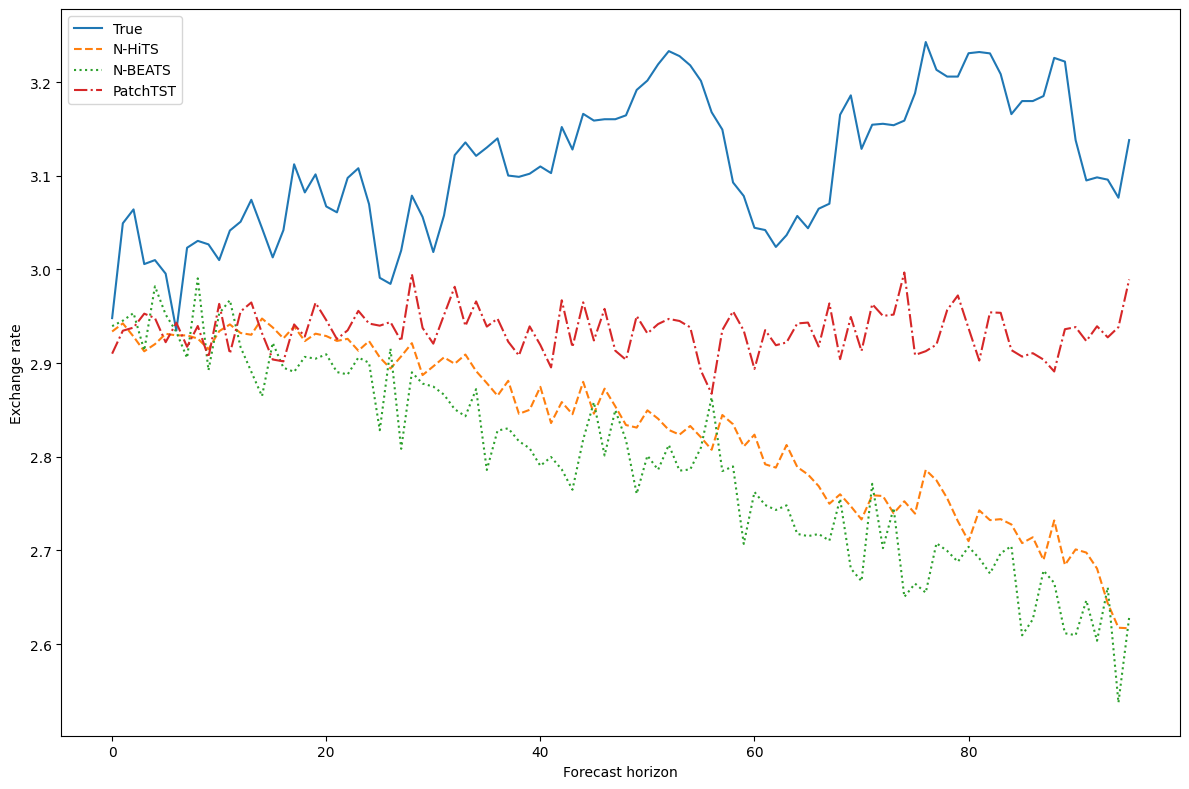

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(y_true[0, 0, :], label='True')
ax.plot(y_pred_nhits[0, 0, :], label='N-HiTS', ls='--')
ax.plot(y_pred_nbeats[0, 0, :], label='N-BEATS', ls=':')
ax.plot(y_pred_patchtst[0, 0, :], label='PatchTST', ls='-.')
ax.set_ylabel('Exchange rate')
ax.set_xlabel('Forecast horizon')
ax.legend(loc='best')

plt.tight_layout()

In [ ]:
data = {'N-HiTS': [mae(y_pred_nhits, y_true), mse(y_pred_nhits, y_true)],
       'N-BEATS': [mae(y_pred_nbeats, y_true), mse(y_pred_nbeats, y_true)],
       'PatchTST': [mae(y_pred_patchtst, y_true), mse(y_pred_patchtst, y_true)]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

,N-HiTS,N-BEATS,PatchTST
mae,0.197424,0.198026,0.198078
mse,0.078115,0.078285,0.081655
